In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import humanize
import plotly.express as px

In [2]:
sns.set_style('darkgrid')

In [3]:
apartments = pd.read_csv('../../data/processed/apartments.csv')
chapinero =  apartments[(apartments['tipo_operacion'] == 'VENTA') & (apartments['localidad'] == 'CHAPINERO') & (apartments['coords_modified'] == False)]
chapinero = chapinero.drop(columns=['precio_arriendo'])
chapinero.head()

,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,...,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
6,3390-M4320821,APARTAMENTO,VENTA,3.900000e+09,432.00,4.0,5.0,3000000.0,4.0,CHICO,...,0,0,1,1,False,CHAPINERO,S.C. EL NOGAL,Héroes,960.91,0
17,897-M4156030,APARTAMENTO,VENTA,3.900000e+08,40.00,1.0,2.0,NaN,1.0,CHAPINERO ALTO,...,0,0,1,0,False,CHAPINERO,S.C. CHAPINERO CENTRAL,Calle 57,242.21,1
18,11301-1492,APARTAMENTO,VENTA,2.100000e+09,350.00,3.0,4.0,2040000.0,3.0,OTROS,...,0,1,1,0,False,CHAPINERO,CHICO ORIENTAL,Calle 85,2151.16,0
19,11013-M4424136,APARTAMENTO,VENTA,8.450000e+08,138.96,3.0,4.0,1170000.0,2.0,CHICO,...,0,0,1,0,False,CHAPINERO,S.C. CHICO NORTE,Virrey,1115.25,0
20,293-M3798297,APARTAMENTO,VENTA,1.700000e+09,178.00,3.0,4.0,1128000.0,3.0,CHAPINERO ALTO,...,0,1,1,0,False,CHAPINERO,ZAMUDIO,Flores,1138.96,0


In [4]:
chapinero.datetime = pd.to_datetime(chapinero.datetime)
chapinero.fecha_actualizacion_precio_venta = pd.to_datetime(chapinero.fecha_actualizacion_precio_venta)

In [5]:
chapinero.shape

(9682, 37)

In [6]:
chapinero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9682 entries, 6 to 55008
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   codigo                               9682 non-null   object        
 1   tipo_propiedad                       9682 non-null   object        
 2   tipo_operacion                       9682 non-null   object        
 3   precio_venta                         9682 non-null   float64       
 4   area                                 9682 non-null   float64       
 5   habitaciones                         9682 non-null   float64       
 6   banos                                9682 non-null   float64       
 7   administracion                       8812 non-null   float64       
 8   parqueaderos                         9682 non-null   float64       
 9   sector                               9326 non-null   object        
 10  estrato         

In [7]:
chapinero.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'datetime', 'website', 'compañia', 'fecha_actualizacion_precio_venta',
       'precio_venta_anterior', 'fecha_actualizacion_precio_arriendo',
       'precio_arriendo_anterior', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm'],
      dtype='object')

In [8]:
def format_tick_humanize(value, tick_number):
    return humanize.intword(value)

# Eliminar outliers

Eliminamos los precios que son outliers

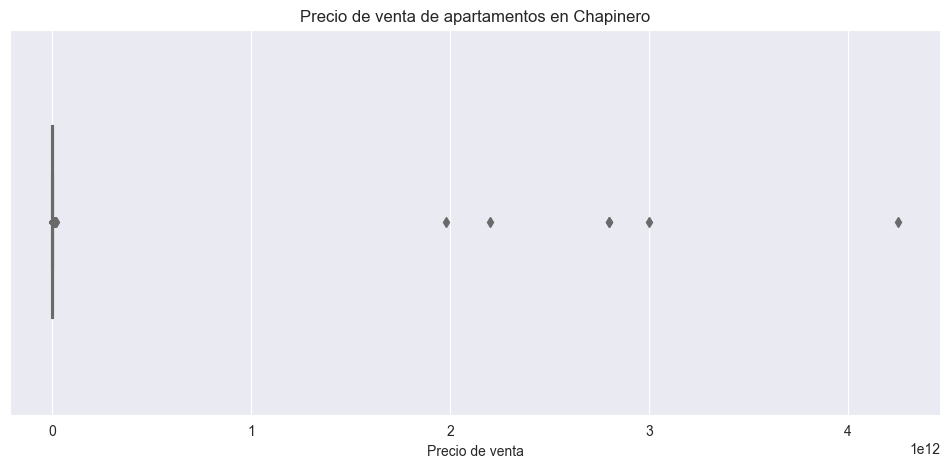

In [9]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='precio_venta',
    width=.5,
    palette='Set3',
)

plt.title('Precio de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.show()

In [10]:
Q1 = chapinero['precio_venta'].quantile(0.25)
Q3 = chapinero['precio_venta'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = chapinero[(chapinero['precio_venta'] < lower) | (chapinero['precio_venta'] > upper)]
outliers.shape

(467, 37)

In [11]:
chapinero = chapinero[(chapinero['precio_venta'] > lower) & (chapinero['precio_venta'] < upper)]
chapinero.shape

(9215, 37)

# Analisis Univariado

## Area (m2)

### Eliminar outliers

In [12]:
# eliminar area igual a 0

chapinero = chapinero[chapinero['area'] > 0]

Eliminamos las areas (m2) que son outliers

In [13]:
Q1 = chapinero['area'].quantile(0.25)
Q3 = chapinero['area'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = chapinero[(chapinero['area'] < lower) | (chapinero['area'] > upper)]
outliers.shape

(117, 37)

In [14]:
chapinero = chapinero[(chapinero['area'] > lower) & (chapinero['area'] < upper)]
chapinero.shape

(9062, 37)

### Analisis

In [15]:
chapinero.area.describe().apply(lambda x: humanize.intcomma(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
area,"9,062.0",169.3388225557272,85.73975142687279,1.0,100.0,160.0,230.0,425.0


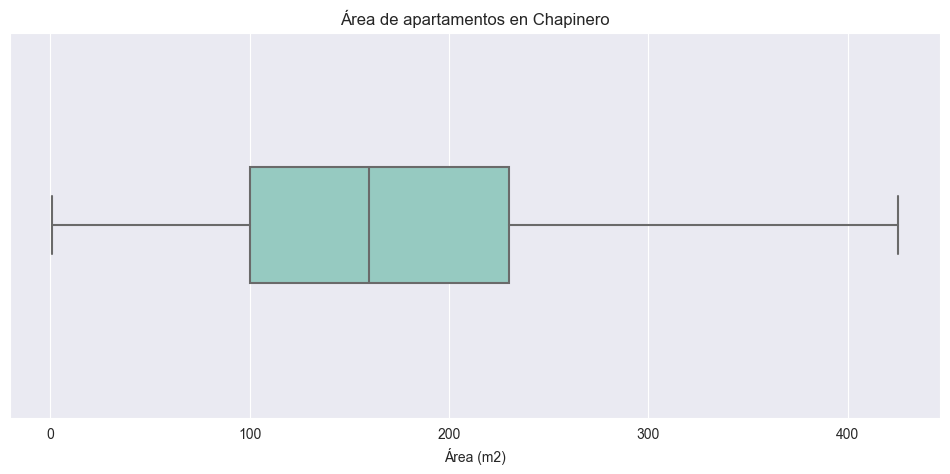

In [16]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='area',
    width=.3,
    palette='Set3',
)

plt.title('Área de apartamentos en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

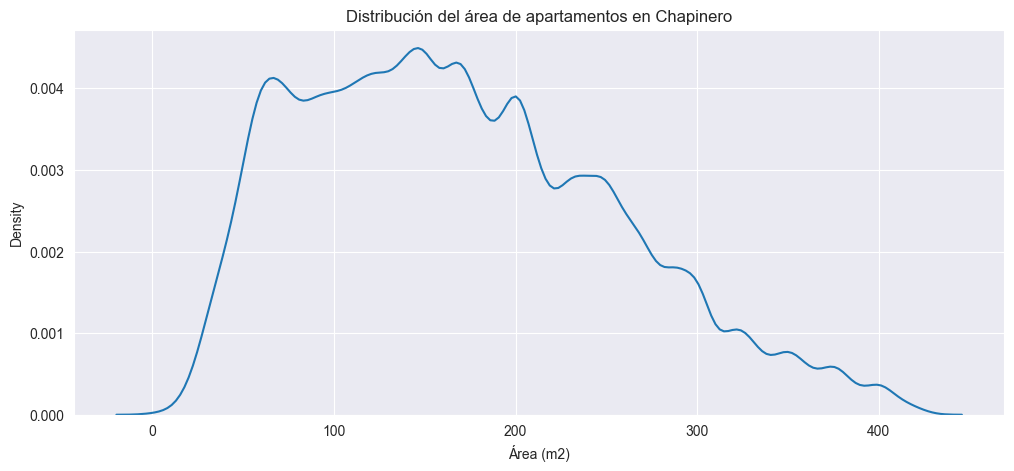

In [17]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
)

plt.title('Distribución del área de apartamentos en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

### Cercania a Transmilenio

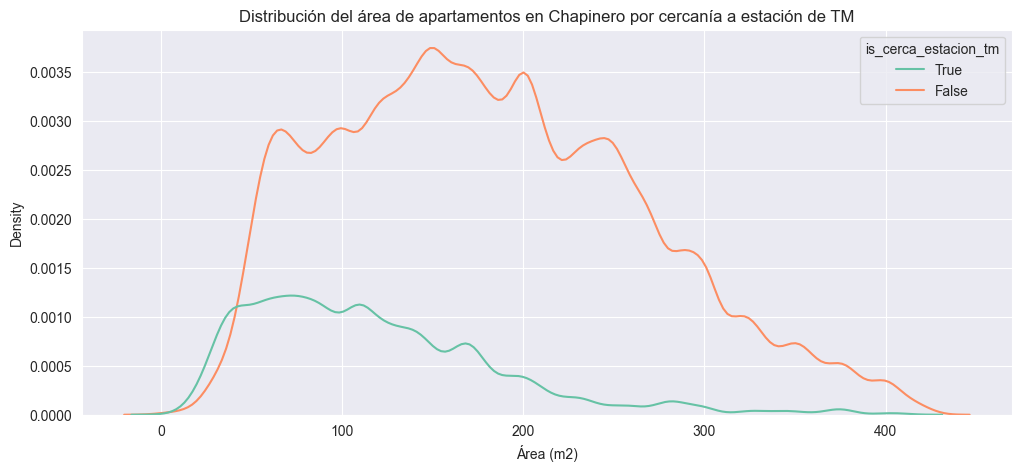

In [18]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='is_cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('Distribución del área de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.show()

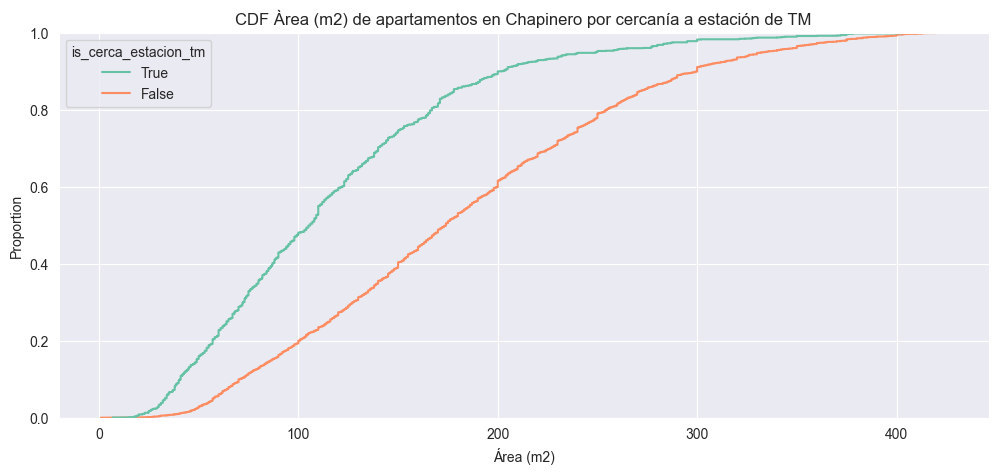

In [22]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='is_cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('CDF Àrea (m2) de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.show()


### Estrato

In [23]:
chapinero.groupby('estrato')['area'].describe().applymap(lambda x: round(x, 1))

,count,mean,std,min,25%,50%,75%,max
estrato,,,,,,,,
0.0,10.0,217.7,122.1,104.0,111.8,165.0,344.0,400.0
1.0,13.0,142.7,57.3,29.0,133.4,139.0,168.7,253.0
2.0,6.0,94.9,114.2,30.0,34.0,53.5,73.2,325.0
3.0,191.0,60.3,40.9,6.9,37.0,46.0,72.0,280.0
4.0,818.0,87.2,52.7,14.0,53.0,73.0,107.0,343.0
5.0,912.0,132.2,66.0,20.0,83.0,119.7,171.0,420.0
6.0,7105.0,186.5,82.7,1.0,124.0,178.0,244.0,425.0


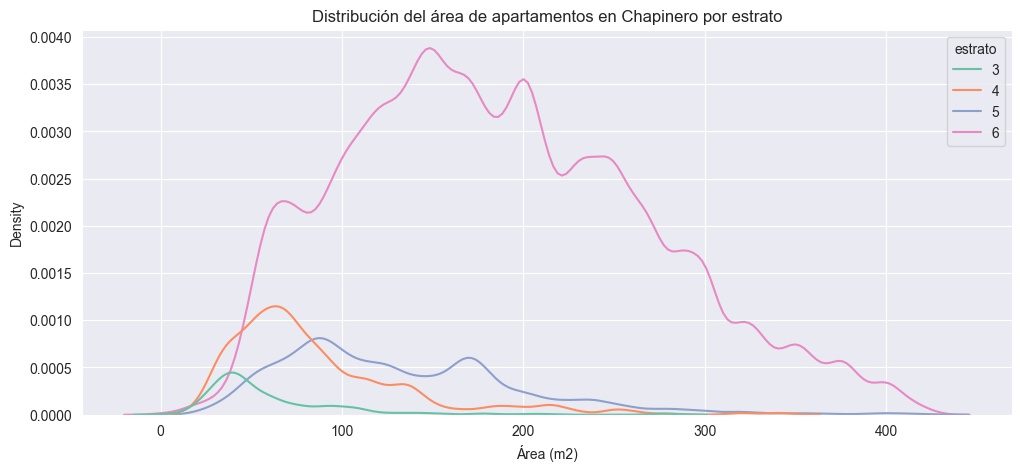

In [24]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Chapinero por estrato')
plt.xlabel('Área (m2)')
plt.show()

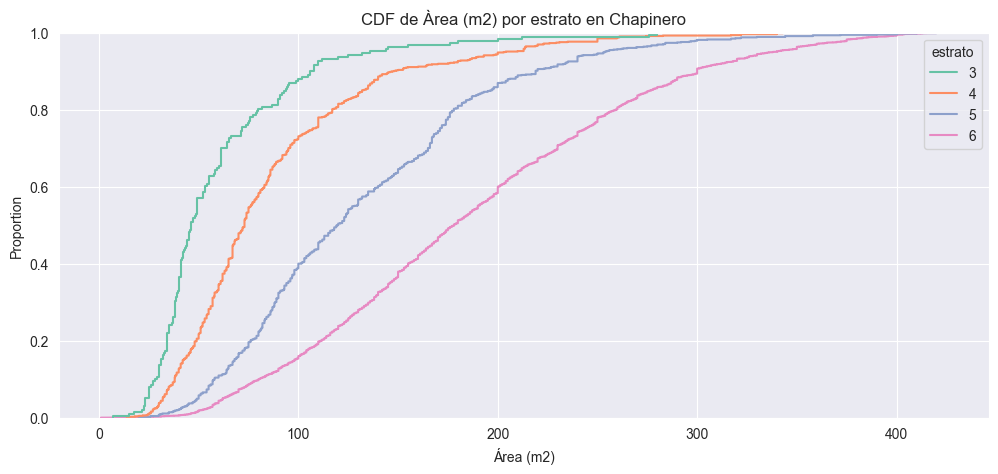

In [27]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='estrato',
    palette='Set2',
    hue_order=[3, 4, 5, 6],
)

plt.title('CDF de Àrea (m2) por estrato en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

### Antiguedad

In [28]:
chapinero.groupby('antiguedad')['area'].describe().applymap(lambda x: round(x, 1))

,count,mean,std,min,25%,50%,75%,max
antiguedad,,,,,,,,
ENTRE 0 Y 5 ANOS,1412.0,134.9,79.9,1.0,66.0,124.0,185.0,404.0
ENTRE 10 Y 20 ANOS,1951.0,169.5,85.8,18.0,100.0,160.0,230.0,417.0
ENTRE 5 Y 10 ANOS,1478.0,153.9,81.6,6.9,83.6,140.0,208.0,412.0
MAS DE 20 ANOS,3853.0,185.1,83.7,4.0,119.0,175.0,240.0,423.0
REMODELADO,366.0,197.5,92.2,27.0,130.2,195.7,259.8,425.0


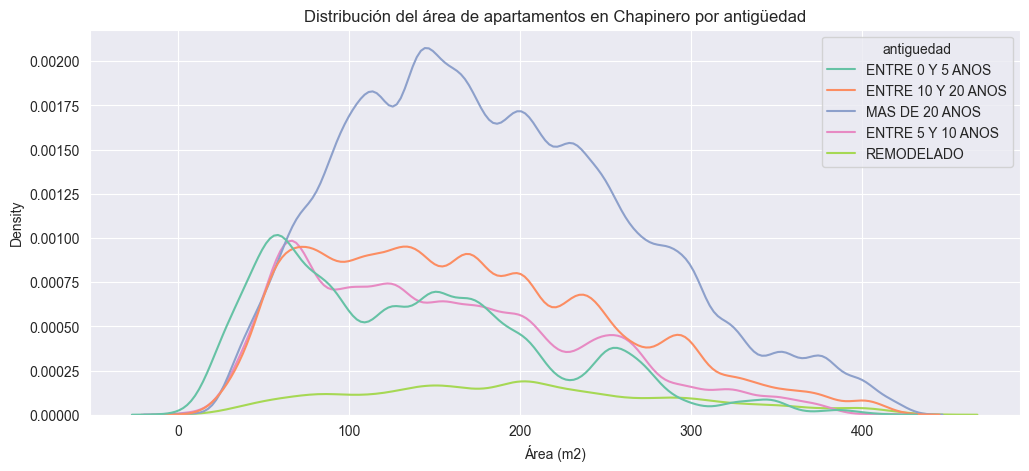

In [29]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='antiguedad',
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Chapinero por antigüedad')
plt.xlabel('Área (m2)')
plt.show()

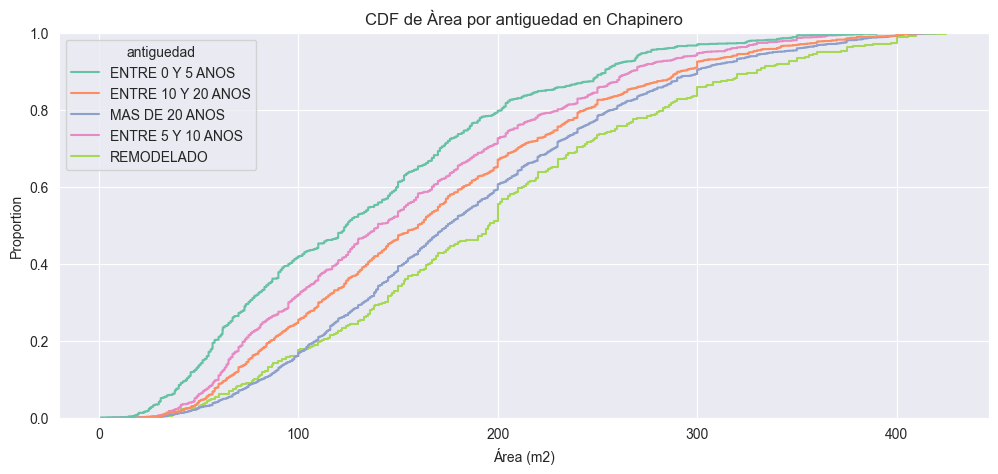

In [30]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF de Àrea por antiguedad en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

Lo apartamentos mas recientes tienden a tener un Àrea menor que los mas antiguos

### Estacion de TM Cercana

In [31]:
estacion_tm_cercana = chapinero[chapinero['is_cerca_estacion_tm'] == True]
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['area'].describe().applymap(lambda x: round(x, 1)).sort_values(by='mean', ascending=False)
estacion_tm_cercana_stats

,count,mean,std,min,25%,50%,75%,max
estacion_tm_cercana,,,,,,,,
Héroes,24.0,160.3,97.9,48.0,98.0,119.5,193.5,403.0
Virrey,372.0,145.9,74.5,38.0,89.0,130.0,198.0,408.0
Calle 100,433.0,127.4,66.5,17.0,77.0,120.0,158.0,378.0
Calle 85,344.0,124.4,51.9,31.8,83.0,116.0,163.2,400.0
Calle 72,16.0,118.0,76.5,40.0,66.0,75.4,189.0,260.0
Flores,32.0,112.0,72.0,30.0,59.5,104.4,133.0,370.0
Calle 76 - San Felipe,38.0,106.9,60.4,30.9,61.9,99.7,126.2,321.2
AV. 39,22.0,78.8,35.7,29.0,50.1,85.0,112.6,134.2
Calle 45,67.0,77.1,43.6,29.0,39.0,62.0,107.2,193.0


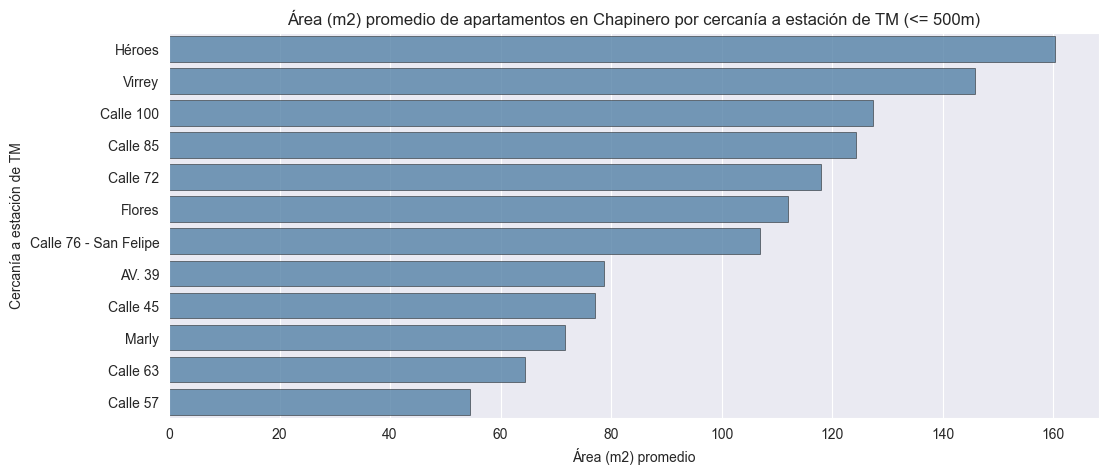

In [32]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='mean',
    # palette='Set2',
    color='steelblue',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Área (m2) promedio de apartamentos en Chapinero por cercanía a estación de TM (<= 500m)')
plt.xlabel('Área (m2) promedio')
plt.ylabel('Cercanía a estación de TM')
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x500 with 0 Axes>

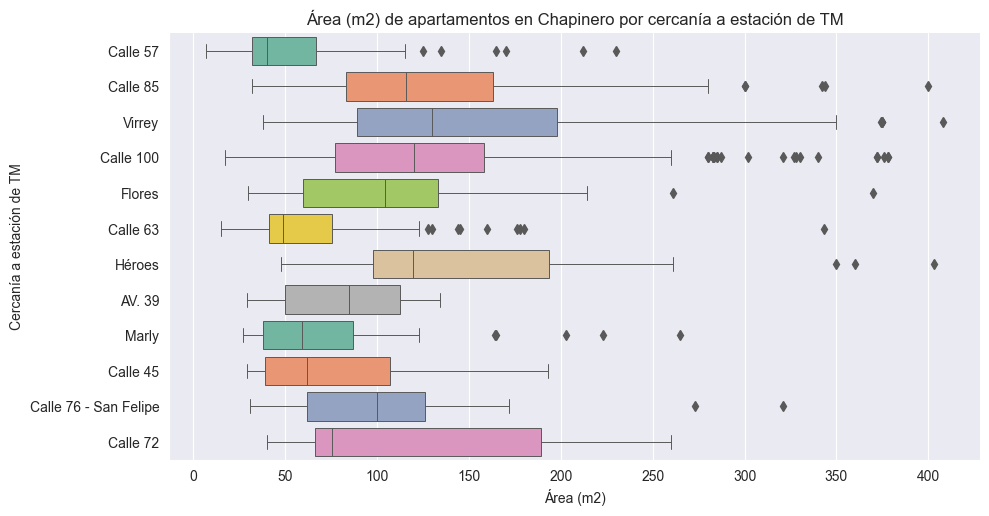

In [33]:
plt.figure(figsize=(12, 5))

sns.catplot(
    data=estacion_tm_cercana,
    x='area',
    y='estacion_tm_cercana',
    kind='box',
    height=5,
    aspect=2,
    palette='Set2',
    orient='h',
    linewidth=.7,
)

plt.title('Área (m2) de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.ylabel('Cercanía a estación de TM')
plt.show()

## Precio de venta

In [34]:
chapinero.precio_venta.describe().apply(lambda x: humanize.intword(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,9.1 thousand,1.4 billion,869.8 million,1.0 million,740.0 million,1.2 billion,1.9 billion,4.1 billion


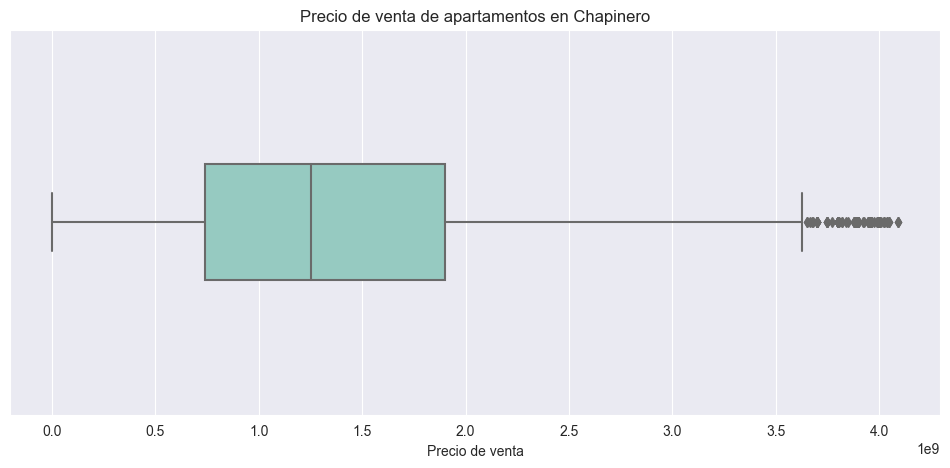

In [36]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='precio_venta',
    width=.3,
    palette='Set3',
)

plt.title('Precio de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.show()

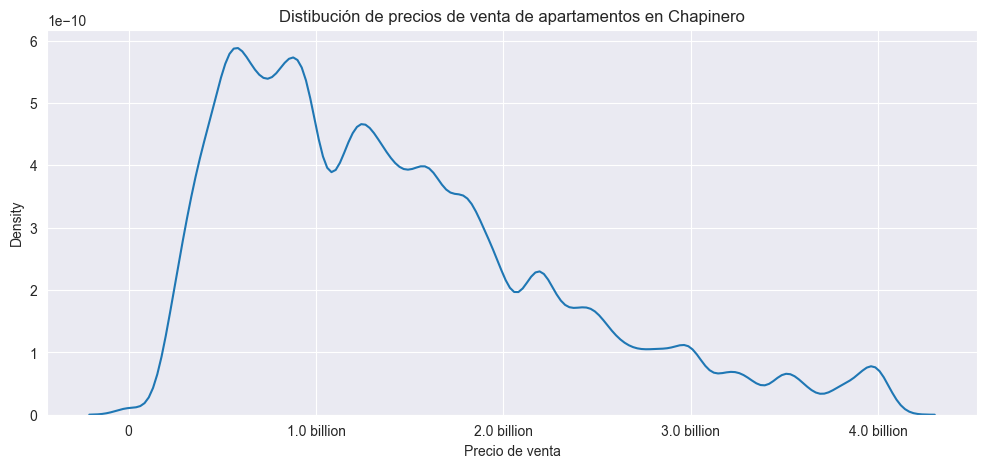

In [37]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Barrios

In [49]:
top_barrios = chapinero.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('precio_venta', 'mean'),
    median=('precio_venta', 'median'),
    std=('precio_venta', 'std'),
).sort_values('mean', ascending=False)

# escoger los que tienen más de 20 registros para que sea más representativo
top_barrios = top_barrios[top_barrios['count'] > 22].head(10)
top_barrios.applymap(lambda x: humanize.intword(x))

,count,mean,median,std
barrio,,,,
LA CABRERA,447,2.1 billion,2.0 billion,872.2 million
S.C. EL RETIRO,191,2.0 billion,1.9 billion,945.7 million
CHICO ORIENTAL,183,2.0 billion,1.9 billion,887.0 million
PINAR ALTO - PINAR II,41,1.9 billion,1.8 billion,784.9 million
ALTOS DE BELLAVISTA,24,1.9 billion,1.6 billion,798.0 million
BOSQUE EL RETIRO I SECTOR,215,1.9 billion,1.7 billion,897.4 million
CHICO ALTO,154,1.9 billion,1.7 billion,722.2 million
S.C. EL BAGAZAL,33,1.8 billion,1.6 billion,810.0 million
LOS ROSALES,834,1.7 billion,1.6 billion,825.3 million


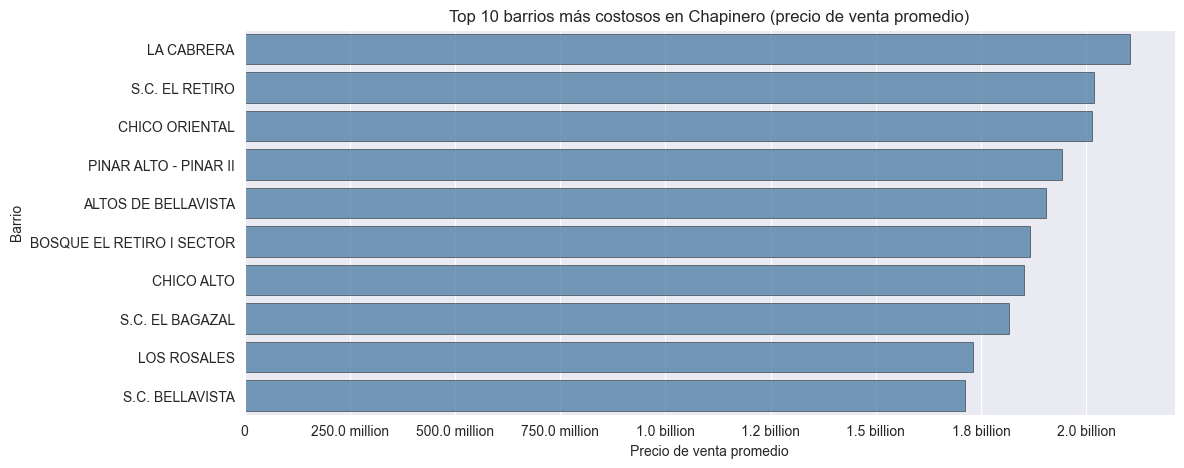

In [50]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios,
    y=top_barrios.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Top 10 barrios más costosos en Chapinero (precio de venta promedio)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))

plt.show()

In [59]:
top_barrios_economicos = chapinero.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('precio_venta', 'mean'),
    median=('precio_venta', 'median'),
    std=('precio_venta', 'std'),
).sort_values('mean', ascending=True)

top_barrios_economicos = top_barrios_economicos[top_barrios_economicos['count'] > 10].head(10)
top_barrios_economicos.applymap(lambda x: humanize.intword(x))

,count,mean,median,std
barrio,,,,
S.C. CHAPINERO CENTRAL,200,347.3 million,320.0 million,166.8 million
LOS OLIVOS,11,353.2 million,240.0 million,289.5 million
S.C. SUCRE,53,386.9 million,350.0 million,165.1 million
S.C. MARLY,56,461.0 million,380.0 million,380.1 million
S.C. CATALUNA,17,482.2 million,413.0 million,216.5 million
S.C. PARDO RUBIO,120,488.3 million,445.0 million,376.3 million
S.C. CHAPINERO NORTE,67,502.9 million,476.0 million,223.5 million
S.C. LA SALLE,87,518.6 million,460.0 million,198.5 million
S.C. MARIA CRISTINA,72,524.5 million,455.0 million,252.4 million


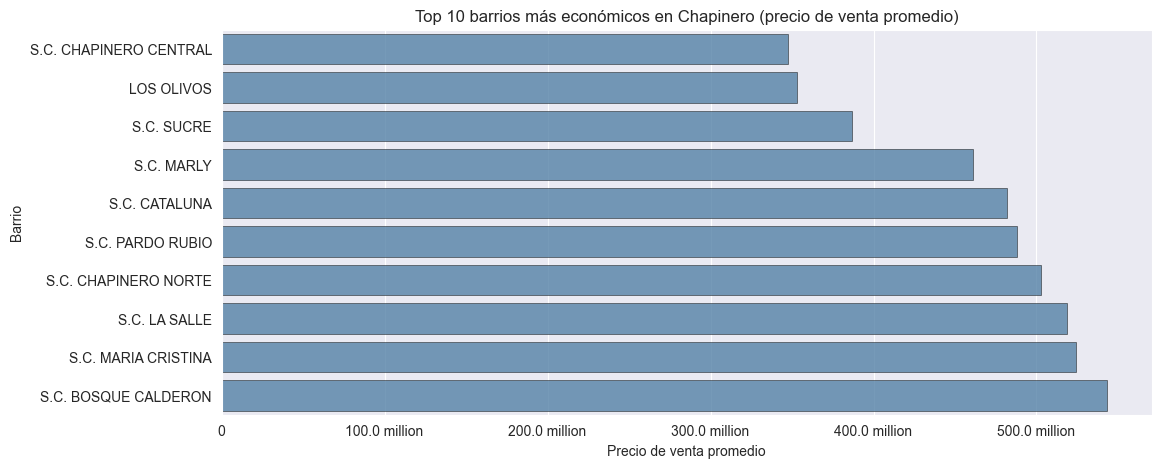

In [61]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios_economicos,
    y=top_barrios_economicos.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Top 10 barrios más económicos en Chapinero (precio de venta promedio)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))

plt.show()

### Cercania a Transmilenio

In [62]:
chapinero.groupby('is_cerca_estacion_tm')['precio_venta'].describe().applymap(lambda x: humanize.intcomma(x))

,count,mean,std,min,25%,50%,75%,max
is_cerca_estacion_tm,,,,,,,,
0,"7,417.0","1,535,704,149.0142915","871,198,677.2897694","1,100,000.0","850,000,000.0","1,390,000,000.0","2,000,000,000.0","4,090,000,000.0"
1,"1,645.0","903,182,759.488146","647,008,194.4434615","1,049,000.0","450,000,000.0","715,000,000.0","1,150,000,000.0","4,000,000,000.0"


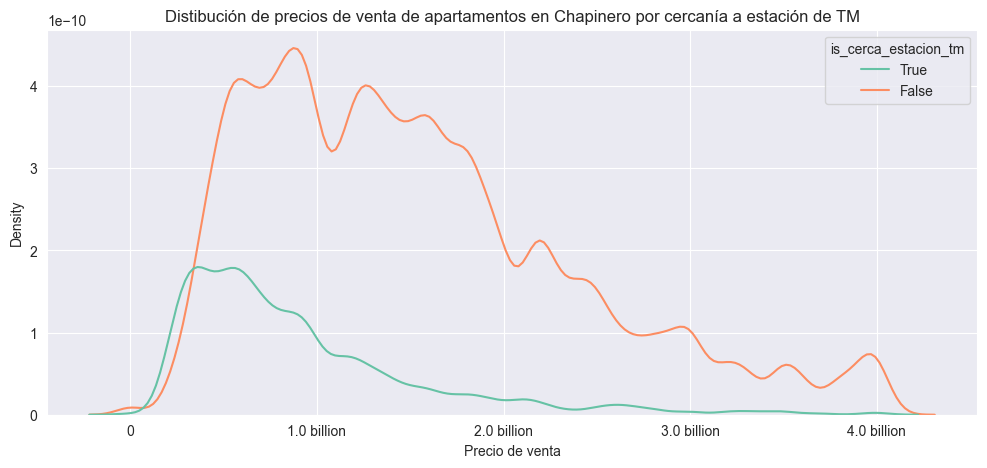

In [63]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

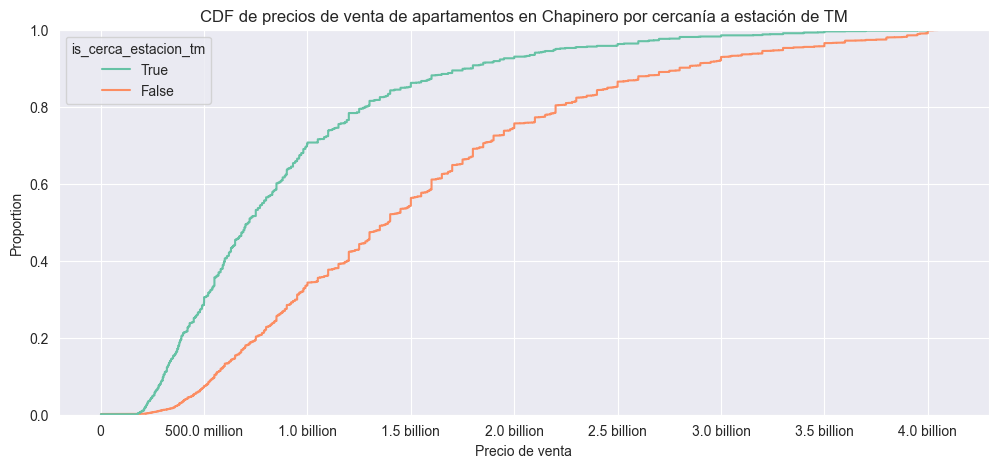

In [64]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Estrato

In [65]:
chapinero.groupby('estrato')['precio_venta'].describe().applymap(lambda x: humanize.intword(x))

,count,mean,std,min,25%,50%,75%,max
estrato,,,,,,,,
0.0,10,1.8 billion,1.1 billion,660.0 million,867.5 million,1.5 billion,2.5 billion,3.8 billion
1.0,13,949.5 million,542.4 million,198.0 million,595.0 million,825.0 million,1.1 billion,2.4 billion
2.0,6,700.5 million,839.5 million,235.0 million,273.5 million,420.0 million,482.5 million,2.4 billion
3.0,191,367.1 million,217.1 million,175.0 million,264.2 million,320.0 million,383.8 million,1.8 billion
4.0,818,579.9 million,397.5 million,180.0 million,365.3 million,470.0 million,630.0 million,3.0 billion
5.0,912,1.1 billion,614.2 million,1.2 million,595.0 million,875.0 million,1.4 billion,4.0 billion
6.0,7.1 thousand,1.6 billion,856.8 million,1.0 million,919.5 million,1.4 billion,2.1 billion,4.1 billion


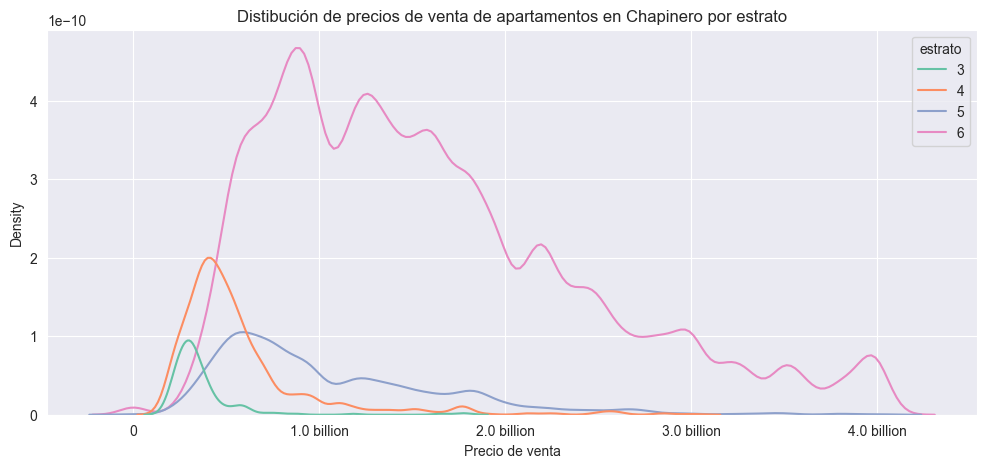

In [66]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por estrato')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

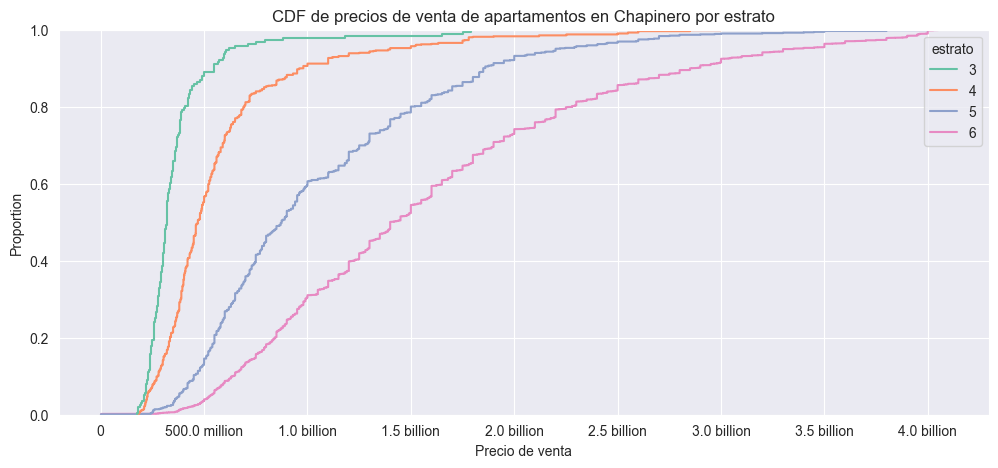

In [67]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por estrato')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

In [68]:
chapinero.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'datetime', 'website', 'compañia', 'fecha_actualizacion_precio_venta',
       'precio_venta_anterior', 'fecha_actualizacion_precio_arriendo',
       'precio_arriendo_anterior', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm'],
      dtype='object')

### Antiguedad del apartamento

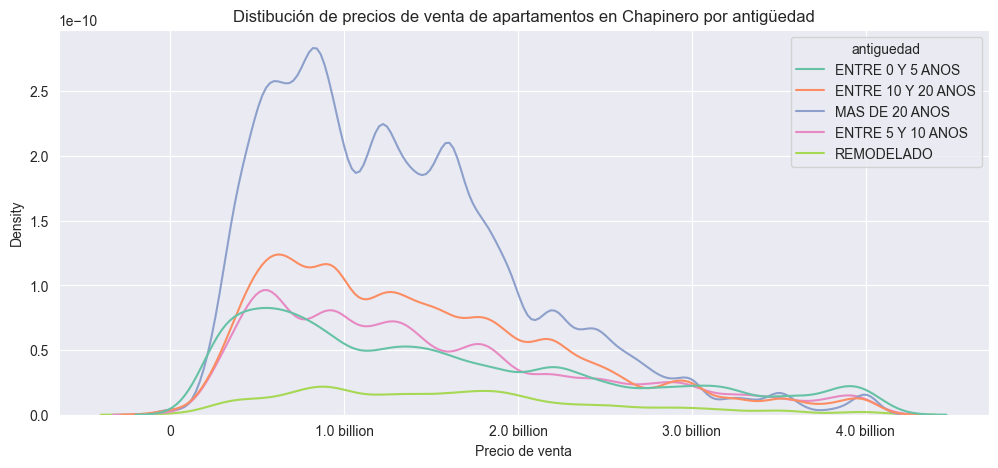

In [69]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='antiguedad',
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por antigüedad')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

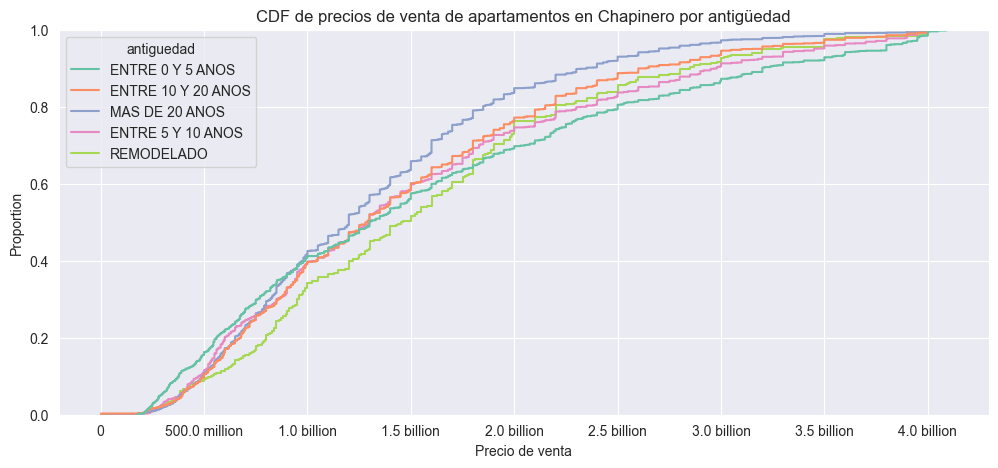

In [70]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por antigüedad')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Estacion de TM Cercana

In [71]:
estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False).applymap(lambda x: humanize.intword(x))

,count,mean,std,min,25%,50%,75%,max
estacion_tm_cercana,,,,,,,,
Virrey,372,1.3 billion,786.2 million,1.0 million,658.8 million,967.5 million,1.7 billion,3.9 billion
Héroes,24,1.2 billion,1.2 billion,2.1 million,550.0 million,565.0 million,1.1 billion,4.0 billion
Calle 85,344,1.1 billion,571.4 million,361.0 million,640.0 million,991.5 million,1.5 billion,3.5 billion
Calle 100,433,911.6 million,498.2 million,255.0 million,590.0 million,830.0 million,1.1 billion,3.7 billion
Calle 72,16,762.0 million,430.1 million,219.0 million,480.0 million,660.5 million,856.2 million,1.8 billion
Flores,32,648.8 million,396.1 million,243.1 million,416.2 million,510.8 million,737.5 million,1.9 billion
Calle 76 - San Felipe,38,644.4 million,384.8 million,190.0 million,381.6 million,599.5 million,755.0 million,2.0 billion
Marly,66,428.6 million,350.8 million,180.0 million,286.2 million,343.5 million,456.8 million,2.9 billion
Calle 45,67,428.2 million,191.4 million,180.0 million,272.5 million,390.0 million,600.0 million,1.1 billion


In [72]:
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False)

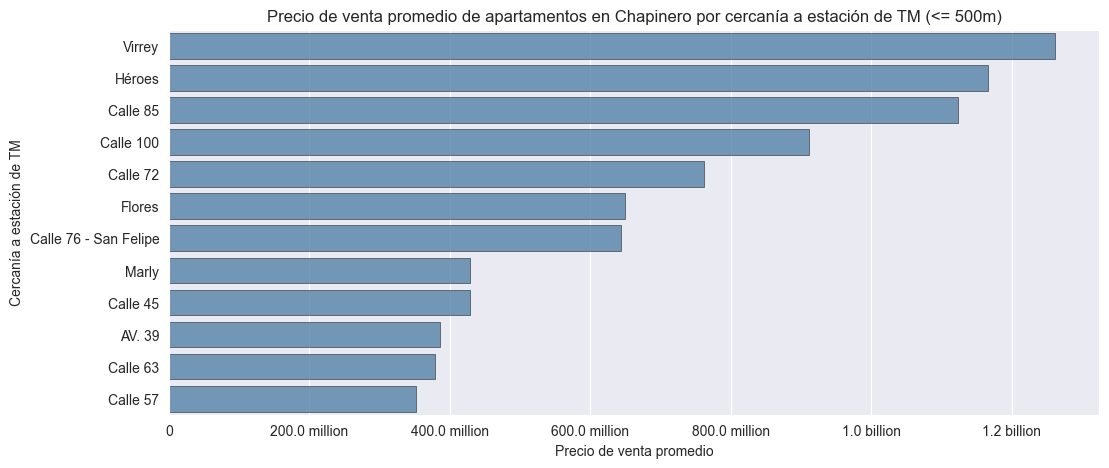

In [73]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Precio de venta promedio de apartamentos en Chapinero por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Cercanía a estación de TM')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Precios Anteriores Vs Actuales

In [74]:
#selcionar todos los datos qut no tenga la columna precio_venta_anterior nula
chapinero_ant = chapinero[chapinero['precio_venta_anterior'].notna()]
chapinero_ant = chapinero_ant[chapinero_ant['fecha_actualizacion_precio_venta'].dt.month == 8]
chapinero_ant.shape

(104, 37)

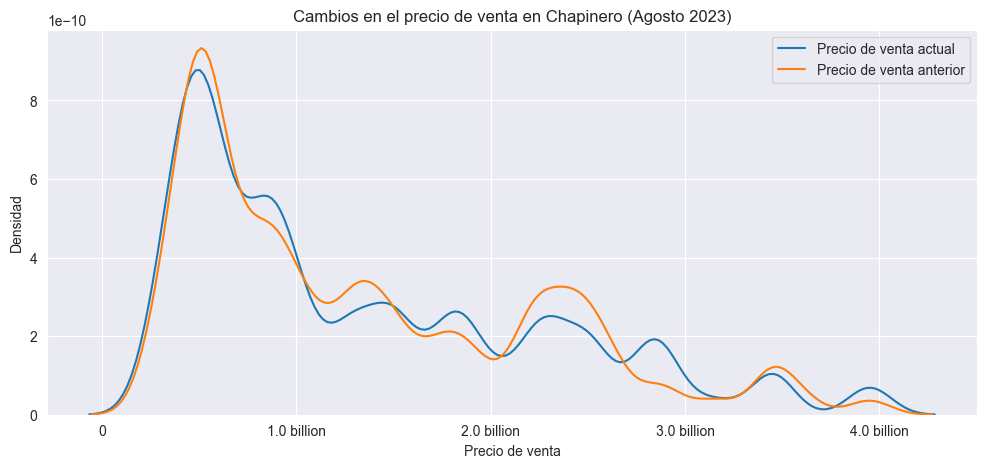

In [75]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero_ant,
    x='precio_venta',
    bw_adjust=.3,
    label='Precio de venta actual',
)

sns.kdeplot(
    chapinero_ant,
    x='precio_venta_anterior',
    bw_adjust=.3,
    label='Precio de venta anterior',
    # alpha=.7
)

#dibuja una linea en el promedio
# plt.axvline(chapinero_ant['precio_venta_anterior'].mean(), color='red', linestyle='--', label='Promedio', alpha=.5)
# plt.axvline(chapinero_ant['precio_venta'].median(), color='green', linestyle='--', label='Mediana', alpha=.5)

plt.title('Cambios en el precio de venta en Chapinero (Agosto 2023)')
plt.xlabel('Precio de venta')
plt.ylabel('Densidad')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.legend()
plt.show()

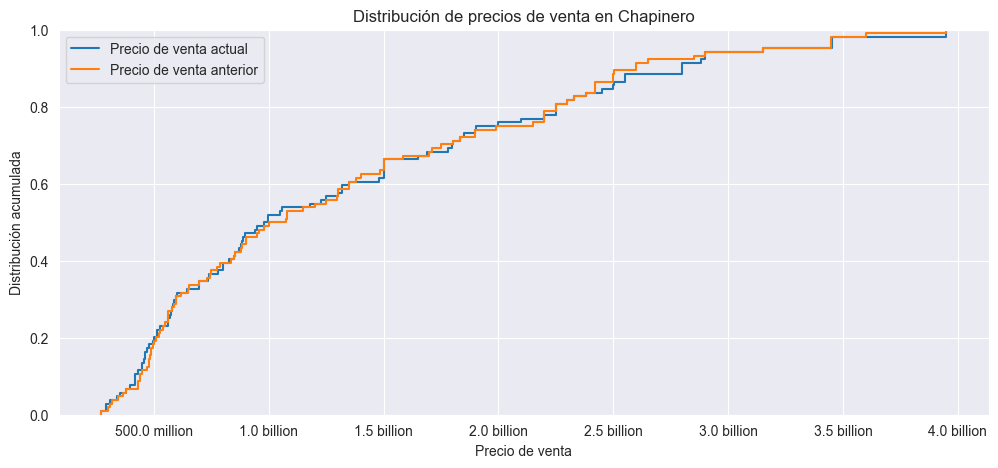

In [76]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero_ant,
    x='precio_venta',
    label='Precio de venta actual',
)

sns.ecdfplot(
    chapinero_ant,
    x='precio_venta_anterior',
    label='Precio de venta anterior',
    # alpha=.7
)

plt.title('Distribución de precios de venta en Chapinero')
plt.xlabel('Precio de venta')
plt.ylabel('Distribución acumulada')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.legend()
plt.show()

In [77]:
chapinero_ant.precio_venta.describe().apply(lambda x: humanize.intword(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,104,1.3 billion,941.5 million,270.0 million,567.5 million,989.0 million,1.9 billion,4.0 billion


In [78]:
chapinero_ant.precio_venta.describe().apply(lambda x: humanize.intword(x))

count              104
mean       1.3 billion
std      941.5 million
min      270.0 million
25%      567.5 million
50%      989.0 million
75%        1.9 billion
max        4.0 billion
Name: precio_venta, dtype: object

In [79]:
chapinero_ant.precio_venta_anterior.describe().apply(lambda x: humanize.intword(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta_anterior,104,1.3 billion,912.1 million,271.0 million,560.8 million,1.0 billion,2.0 billion,3.9 billion


In [80]:
chapinero_ant.precio_venta_anterior.describe().apply(lambda x: humanize.intword(x))

count              104
mean       1.3 billion
std      912.1 million
min      271.0 million
25%      560.8 million
50%        1.0 billion
75%        2.0 billion
max        3.9 billion
Name: precio_venta_anterior, dtype: object

Se observan cambios en varios aspectos clave:

- **Promedio:** El promedio de los precios se mantiene constante en alrededor de 1.3 mil millones en ambas ocasiones, indicando cierta estabilidad en los precios medios de los apartamentos.

- **Variabilidad:** La desviación estándar ha aumentado en los precios actuales, lo que sugiere una mayor variabilidad en los precios individuales en comparación con los precios anteriores.

- **Mediana:** La mediana, que representa el valor central en la distribución, ha experimentado un aumento significativo en los precios actuales. Esto sugiere que el segmento medio del mercado de apartamentos ha experimentado un incremento en los precios.

- **Percentiles:** Los percentiles del 25% y 75% también han aumentado en los precios actuales, indicando que tanto los apartamentos más asequibles como los más caros han experimentado un aumento en sus precios.

En general, los datos reflejan un aumento generalizado en los precios de venta de apartamentos en agosto actual en comparación con los precios anteriores. Esto podría ser indicativo de cambios en la demanda, la oferta u otros factores económicos que han influido en el mercado inmobiliario. Sin embargo, sería útil tener en cuenta otros factores externos y un análisis más detallado para obtener una comprensión completa de las razones detrás de estos cambios en los precios.

## Antiguedad

In [81]:
chapinero.antiguedad.value_counts()

antiguedad
MAS DE 20 ANOS        3853
ENTRE 10 Y 20 ANOS    1951
ENTRE 5 Y 10 ANOS     1478
ENTRE 0 Y 5 ANOS      1412
REMODELADO             366
Name: count, dtype: int64

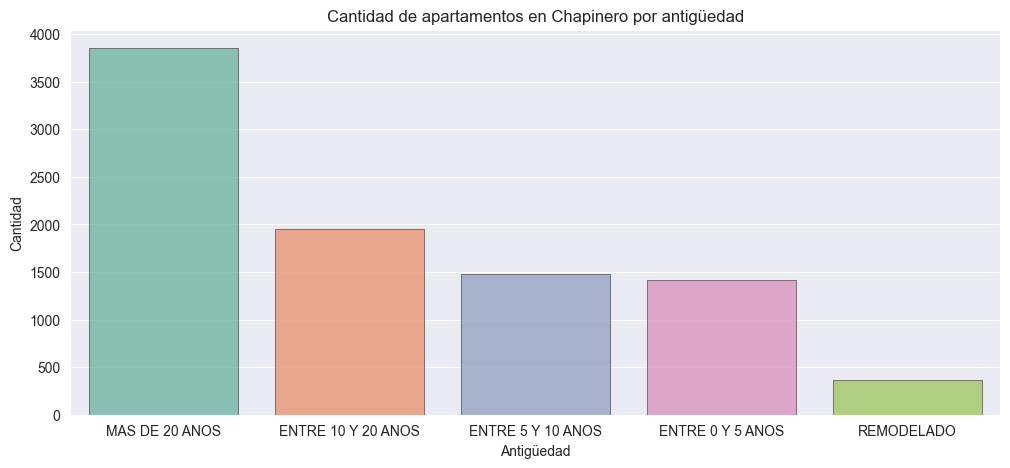

In [82]:
plt.figure(figsize=(12, 5))

sns.countplot(
    chapinero,
    x='antiguedad',
    order=chapinero.antiguedad.value_counts().index,
    palette='Set2',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Cantidad de apartamentos en Chapinero por antigüedad')
plt.xlabel('Antigüedad')
plt.ylabel('Cantidad')
plt.show()

### Barrios

In [83]:
chapinero.groupby('antiguedad')['barrio'].describe()

,count,unique,top,freq
antiguedad,,,,
ENTRE 0 Y 5 ANOS,1412,53,S.C. CHICO NORTE,187
ENTRE 10 Y 20 ANOS,1951,66,S.C. CHICO NORTE,260
ENTRE 5 Y 10 ANOS,1478,63,S.C. CHICO NORTE,200
MAS DE 20 ANOS,3853,70,LOS ROSALES,397
REMODELADO,366,49,S.C. BELLAVISTA,46


In [84]:
chapinero.groupby('antiguedad')['area'].describe().apply(lambda x: round(x,1))

,count,mean,std,min,25%,50%,75%,max
antiguedad,,,,,,,,
ENTRE 0 Y 5 ANOS,1412.0,134.9,79.9,1.0,66.0,124.0,185.0,404.0
ENTRE 10 Y 20 ANOS,1951.0,169.5,85.8,18.0,100.0,160.0,230.0,417.0
ENTRE 5 Y 10 ANOS,1478.0,153.9,81.6,6.9,83.6,140.0,208.0,412.0
MAS DE 20 ANOS,3853.0,185.1,83.7,4.0,119.0,175.0,240.0,423.0
REMODELADO,366.0,197.5,92.2,27.0,130.2,195.7,259.8,425.0


In [86]:
chapinero.groupby('barrio')['antiguedad'].describe().sort_values(by='count', ascending=False).head(10)

,count,unique,top,freq
barrio,,,,
S.C. CHICO NORTE,1072,5,MAS DE 20 ANOS,388
S.C. EL CHICO,839,5,MAS DE 20 ANOS,275
LOS ROSALES,834,5,MAS DE 20 ANOS,397
S.C. CHICO NORTE III SECTOR,776,5,MAS DE 20 ANOS,362
S.C. BELLAVISTA,610,5,MAS DE 20 ANOS,339
LA CABRERA,447,5,MAS DE 20 ANOS,210
S.C. ANTIGUO COUNTRY,425,5,ENTRE 0 Y 5 ANOS,141
S.C. EL NOGAL,363,5,MAS DE 20 ANOS,236
CHICO RESERVADO,360,5,ENTRE 10 Y 20 ANOS,125


### Estrato

## Barrios

In [87]:
chapinero.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10)

,codigo
barrio,
S.C. CHICO NORTE,1072
S.C. EL CHICO,839
LOS ROSALES,834
S.C. CHICO NORTE III SECTOR,776
S.C. BELLAVISTA,610
LA CABRERA,447
S.C. ANTIGUO COUNTRY,425
S.C. EL NOGAL,363
CHICO RESERVADO,360


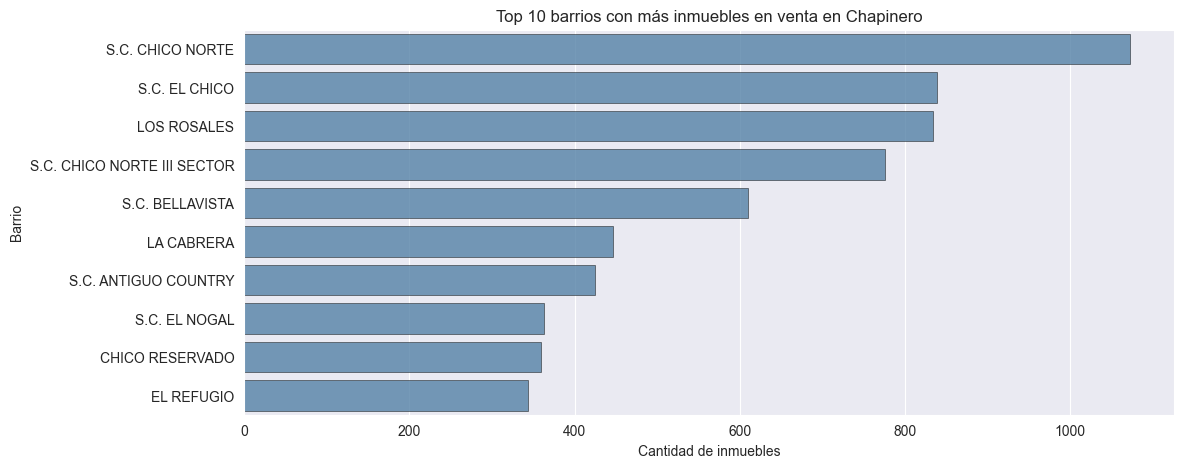

In [88]:
plt.figure(figsize=(12, 5))

sns.barplot(
    data=chapinero.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10),
    x='codigo',
    y=chapinero.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10).index,
    # palette='Set2',
    color='steelblue',
    orient='h',
    edgecolor='black',
    linewidth=.4,
    alpha=.8
)

plt.title('Top 10 barrios con más inmuebles en venta en Chapinero')
plt.xlabel('Cantidad de inmuebles')
plt.ylabel('Barrio')
plt.show()